In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
pwd

'C:\\Users\\Luis\\Desktop\\NOVASBE\\2nd semester\\Machine Learning\\project'

In [3]:
# Data 

# Main file

tracks = pd.read_csv("C:/Users/Luis/Desktop/NOVASBE/2nd semester/Machine Learning/project/SpotGenTrack/Data Sources/spotify_tracks.csv")

# Others

albums = pd.read_csv("C:/Users/Luis/Desktop/NOVASBE/2nd semester/Machine Learning/project/SpotGenTrack/Data Sources/spotify_albums.csv")
artists = pd.read_csv("C:/Users/Luis/Desktop/NOVASBE/2nd semester/Machine Learning/project/SpotGenTrack/Data Sources/spotify_artists.csv")
low_level = pd.read_csv("C:/Users/Luis/Desktop/NOVASBE/2nd semester/Machine Learning/project/SpotGenTrack/Features Extracted/low_level_audio_features.csv")
lyrics = pd.read_csv("C:/Users/Luis/Desktop/NOVASBE/2nd semester/Machine Learning/project/SpotGenTrack/Features Extracted/lyrics_features.csv")

Steps

feature engineering
Shap values
correlation

In [4]:
tracks.head()

Unnamed: 0  acousticness                album_id  \
0           0         0.294  0D3QufeCudpQANOR7luqdr   
1           1         0.863  1bcqsH5UyTBzmh9YizdsBE   
2           2         0.750  4tKijjmxGClg4JOLAyo2qE   
3           3         0.763  6FeJF5r8roonnKraJxr4oB   
4           4         0.770  4tKijjmxGClg4JOLAyo2qE   

                                        analysis_url  \
0  https://api.spotify.com/v1/audio-analysis/5qlj...   
1  https://api.spotify.com/v1/audio-analysis/3VAX...   
2  https://api.spotify.com/v1/audio-analysis/1L3Y...   
3  https://api.spotify.com/v1/audio-analysis/6aCe...   
4  https://api.spotify.com/v1/audio-analysis/1Vo8...   

                   artists_id  \
0  ['3mxJuHRn2ZWD5OofvJtDZY']   
1  ['4xWMewm6CYMstu0sPgd9jJ']   
2  ['3hYaK5FF3YAglCj5HZgBnP']   
3  ['2KQsUB9DRBcJk17JWX1eXD']   
4  ['3hYaK5FF3YAglCj5HZgBnP']   

                                   available_markets country  danceability  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.698   
1  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.719   
2                                             ['GB']      BE         0.466   
3  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.719   
4                                             ['GB']      BE         0.460   

   disc_number  duration_ms  ...  \
0          1.0     235584.0  ...   
1          1.0     656960.0  ...   
2          1.0     492840.0  ...   
3          1.0     316578.0  ...   
4          1.0     558880.0  ...   

                                         preview_url speechiness    tempo  \
0  https://p.scdn.co/mp3-preview/1b05a902da3a251d...      0.0262  115.018   
1  https://p.scdn.co/mp3-preview/d8140736a6131cb5...      0.9220  115.075   
2  https://p.scdn.co/mp3-preview/c8af28fb15185b18...      0.9440   79.565   
3  https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...      0.9380  112.822   
4  https://p.scdn.co/mp3-preview/32be593c0eb82868...      0.9430   81.260   

   time_signature                                         track_href  \
0             4.0  https://api.spotify.com/v1/tracks/5qljLQuKnNJf...   
1             3.0  https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...   
2             4.0  https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...   
3             3.0  https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...   
4             4.0  https://api.spotify.com/v1/tracks/1Vo802A38tPF...   

   track_name_prev  track_number                                   uri  \
0         track_14           1.0  spotify:track:5qljLQuKnNJf4F4vfxQB0V   
1          track_3           3.0  spotify:track:3VAX2MJdmdqARLSU5hPMpm   
2          track_4           4.0  spotify:track:1L3YAhsEMrGVvCgDXj2TYn   
3          track_9           1.0  spotify:track:6aCe9zzoZmCojX7bbgKKtf   
4          track_2           2.0  spotify:track:1Vo802A38tPFHmje1h91um   

   valence   type  
0   0.6220  track  
1   0.5890  track  
2   0.0850  track  
3   0.5330  track  
4   0.0906  track  

[5 rows x 32 columns]

In [5]:
tracks.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101939 entries, 0 to 101938
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   acousticness       101939 non-null  float64
 1   album_id           101939 non-null  object 
 2   analysis_url       101939 non-null  object 
 3   artists_id         101939 non-null  object 
 4   available_markets  101939 non-null  object 
 5   country            101939 non-null  object 
 6   danceability       101939 non-null  float64
 7   disc_number        101939 non-null  float64
 8   duration_ms        101939 non-null  float64
 9   energy             101939 non-null  float64
 10  href               101939 non-null  object 
 11  id                 101939 non-null  object 
 12  instrumentalness   101939 non-null  float64
 13  key                101939 non-null  float64
 14  liveness           101939 non-null  float64
 15  loudness           101939 non-null  float64
 16  ly

In [7]:
tracks.isna().sum()

acousticness         0
album_id             0
analysis_url         0
artists_id           0
available_markets    0
country              0
danceability         0
disc_number          0
duration_ms          0
energy               0
href                 0
id                   0
instrumentalness     0
key                  0
liveness             0
loudness             0
lyrics               0
mode                 0
name                 0
playlist             0
popularity           0
preview_url          0
speechiness          0
tempo                0
time_signature       0
track_href           0
track_name_prev      0
track_number         0
uri                  0
valence              0
type                 0
dtype: int64

In [8]:
tracks.iloc[0]

acousticness                                                     0.294
album_id                                        0D3QufeCudpQANOR7luqdr
analysis_url         https://api.spotify.com/v1/audio-analysis/5qlj...
artists_id                                  ['3mxJuHRn2ZWD5OofvJtDZY']
available_markets    ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...
country                                                             BE
danceability                                                     0.698
disc_number                                                        1.0
duration_ms                                                   235584.0
energy                                                           0.606
href                 https://api.spotify.com/v1/tracks/5qljLQuKnNJf...
id                                              5qljLQuKnNJf4F4vfxQB0V
instrumentalness                                              0.000003
key                                                               10.0
livene

In [57]:
tracks.corr().loc["popularity", :]

acousticness       -0.154408
danceability        0.092382
disc_number        -0.047331
duration_ms        -0.169125
energy              0.153979
instrumentalness   -0.041537
key                -0.000641
liveness           -0.059116
loudness            0.239679
mode               -0.010003
popularity          1.000000
speechiness        -0.304212
tempo               0.061869
time_signature      0.121505
track_number       -0.139460
valence             0.034412
Name: popularity, dtype: float64

In [60]:
tracks[["acousticness", "danceability", "disc_number", "duration_ms", "energy", "instrumentalness", "key",
                     "liveness", "loudness", "mode", "popularity", "speechiness", "tempo", "time_signature", "track_number",
                     "valence"]]

acousticness  danceability  disc_number  duration_ms  energy  \
0           0.294000         0.698          1.0     235584.0   0.606   
1           0.863000         0.719          1.0     656960.0   0.308   
2           0.750000         0.466          1.0     492840.0   0.931   
3           0.763000         0.719          1.0     316578.0   0.126   
4           0.770000         0.460          1.0     558880.0   0.942   
...              ...           ...          ...          ...     ...   
101934      0.005640         0.602          1.0     178893.0   0.904   
101935      0.000406         0.177          1.0     213133.0   0.823   
101936      0.004510         0.539          1.0     226107.0   0.883   
101937      0.333000         0.716          1.0     224133.0   0.748   
101938      0.028400         0.500          1.0     251787.0   0.869   

        instrumentalness   key  liveness  loudness  mode  popularity  \
0               0.000003  10.0    0.1510    -7.447   0.0        28.0   
1               0.000000   6.0    0.2530   -10.340   1.0        31.0   
2               0.000000   4.0    0.9380   -13.605   0.0        31.0   
3               0.000000   3.0    0.1130   -20.254   0.0        14.0   
4               0.000000   7.0    0.9170   -13.749   1.0        32.0   
...                  ...   ...       ...       ...   ...         ...   
101934          0.000000  11.0    0.0875    -4.578   1.0        41.0   
101935          0.005370   7.0    0.2420    -5.561   1.0        44.0   
101936          0.000001   6.0    0.0606    -6.614   0.0        59.0   
101937          0.000007   9.0    0.0899    -6.426   1.0        55.0   
101938          0.000000   2.0    0.4840    -4.781   1.0        33.0   

        speechiness    tempo  time_signature  track_number  valence  
0            0.0262  115.018             4.0           1.0   0.6220  
1            0.9220  115.075             3.0           3.0   0.5890  
2            0.9440   79.565             4.0           4.0   0.0850  
3            0.9380  112.822             3.0           1.0   0.5330  
4            0.9430   81.260             4.0           2.0   0.0906  
...             ...      ...             ...           ...      ...  
101934       0.0327  130.186             4.0           4.0   0.7870  
101935       0.0604  184.260             4.0           7.0   0.3630  
101936       0.0653  118.043             4.0           2.0   0.4060  
101937       0.1510  110.015             4.0           5.0   0.7600  
101938       0.0324  139.749             4.0           9.0   0.6410  

[101939 rows x 16 columns]

<Figure size 7200x4800 with 0 Axes>

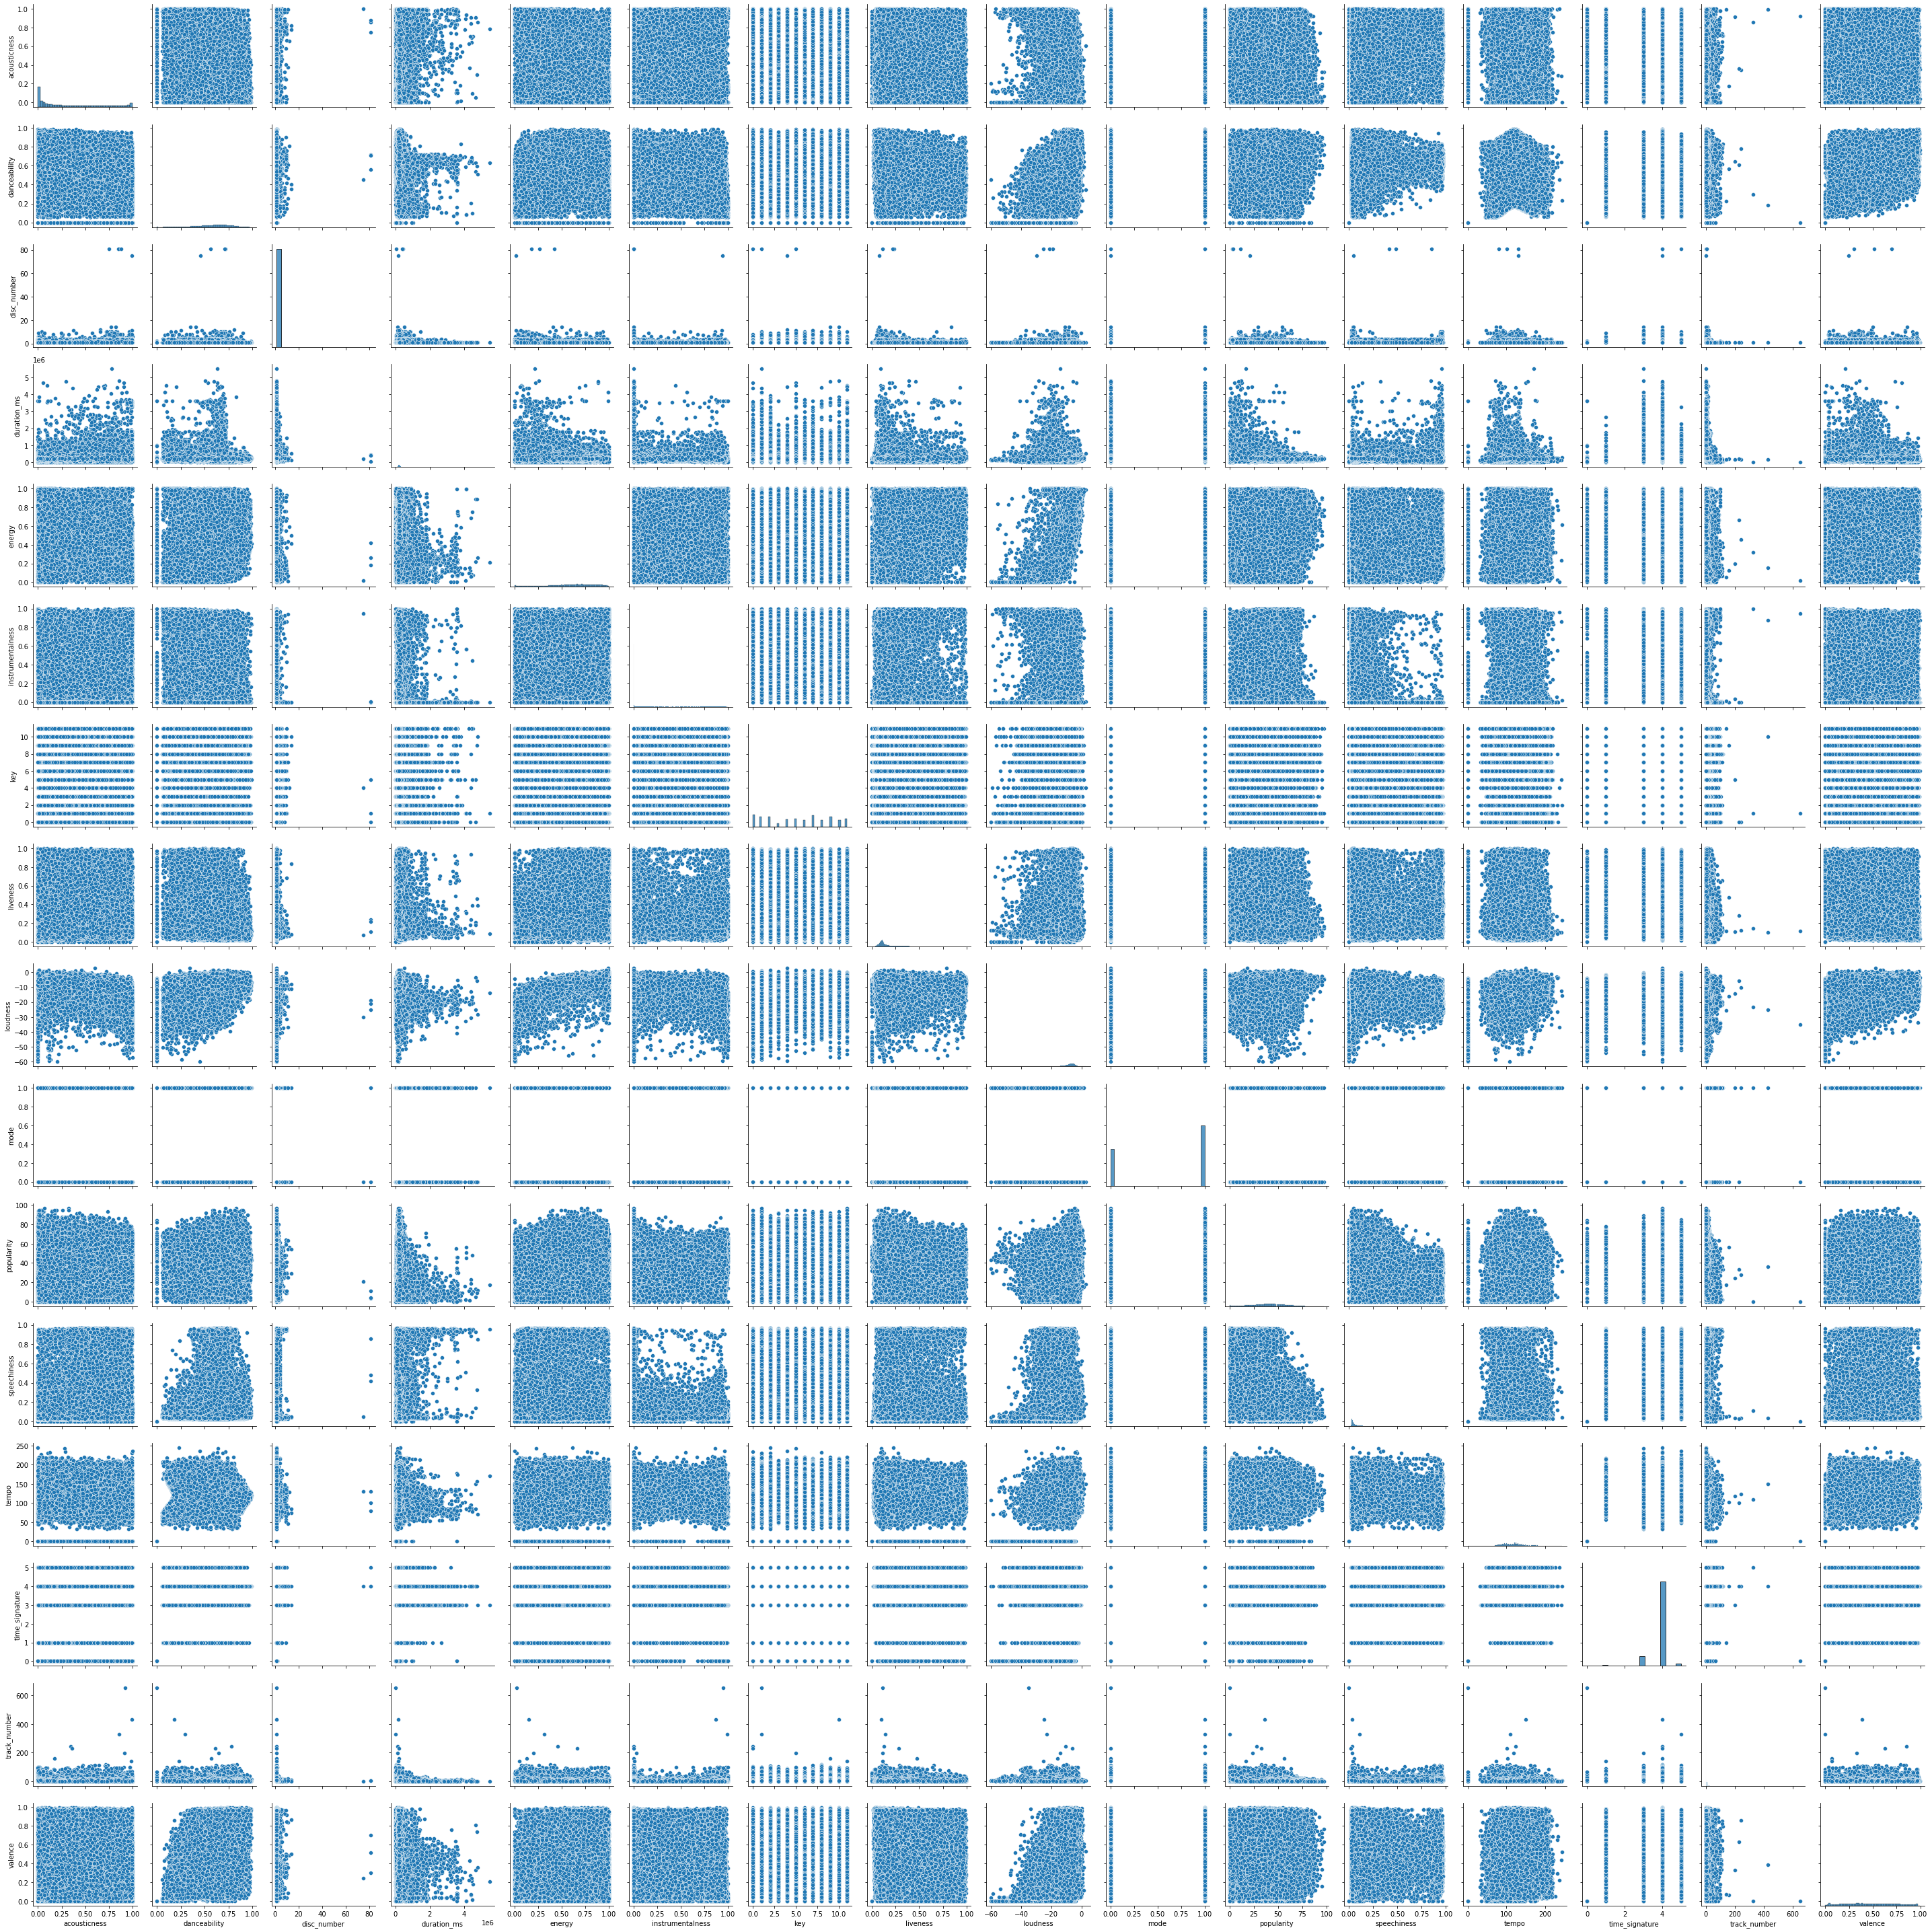

In [61]:
plt.figure(figsize=(12,8), dpi=600)
sns.pairplot(tracks[["acousticness", "danceability", "disc_number", "duration_ms", "energy", "instrumentalness", "key",
                     "liveness", "loudness", "mode", "popularity", "speechiness", "tempo", "time_signature", "track_number",
                     "valence"]])
plt.tight_layout();

In [55]:
tracks["popularity"].describe()

count    101939.000000
mean         39.782311
std          16.790769
min           0.000000
25%          29.000000
50%          41.000000
75%          52.000000
max          97.000000
Name: popularity, dtype: float64

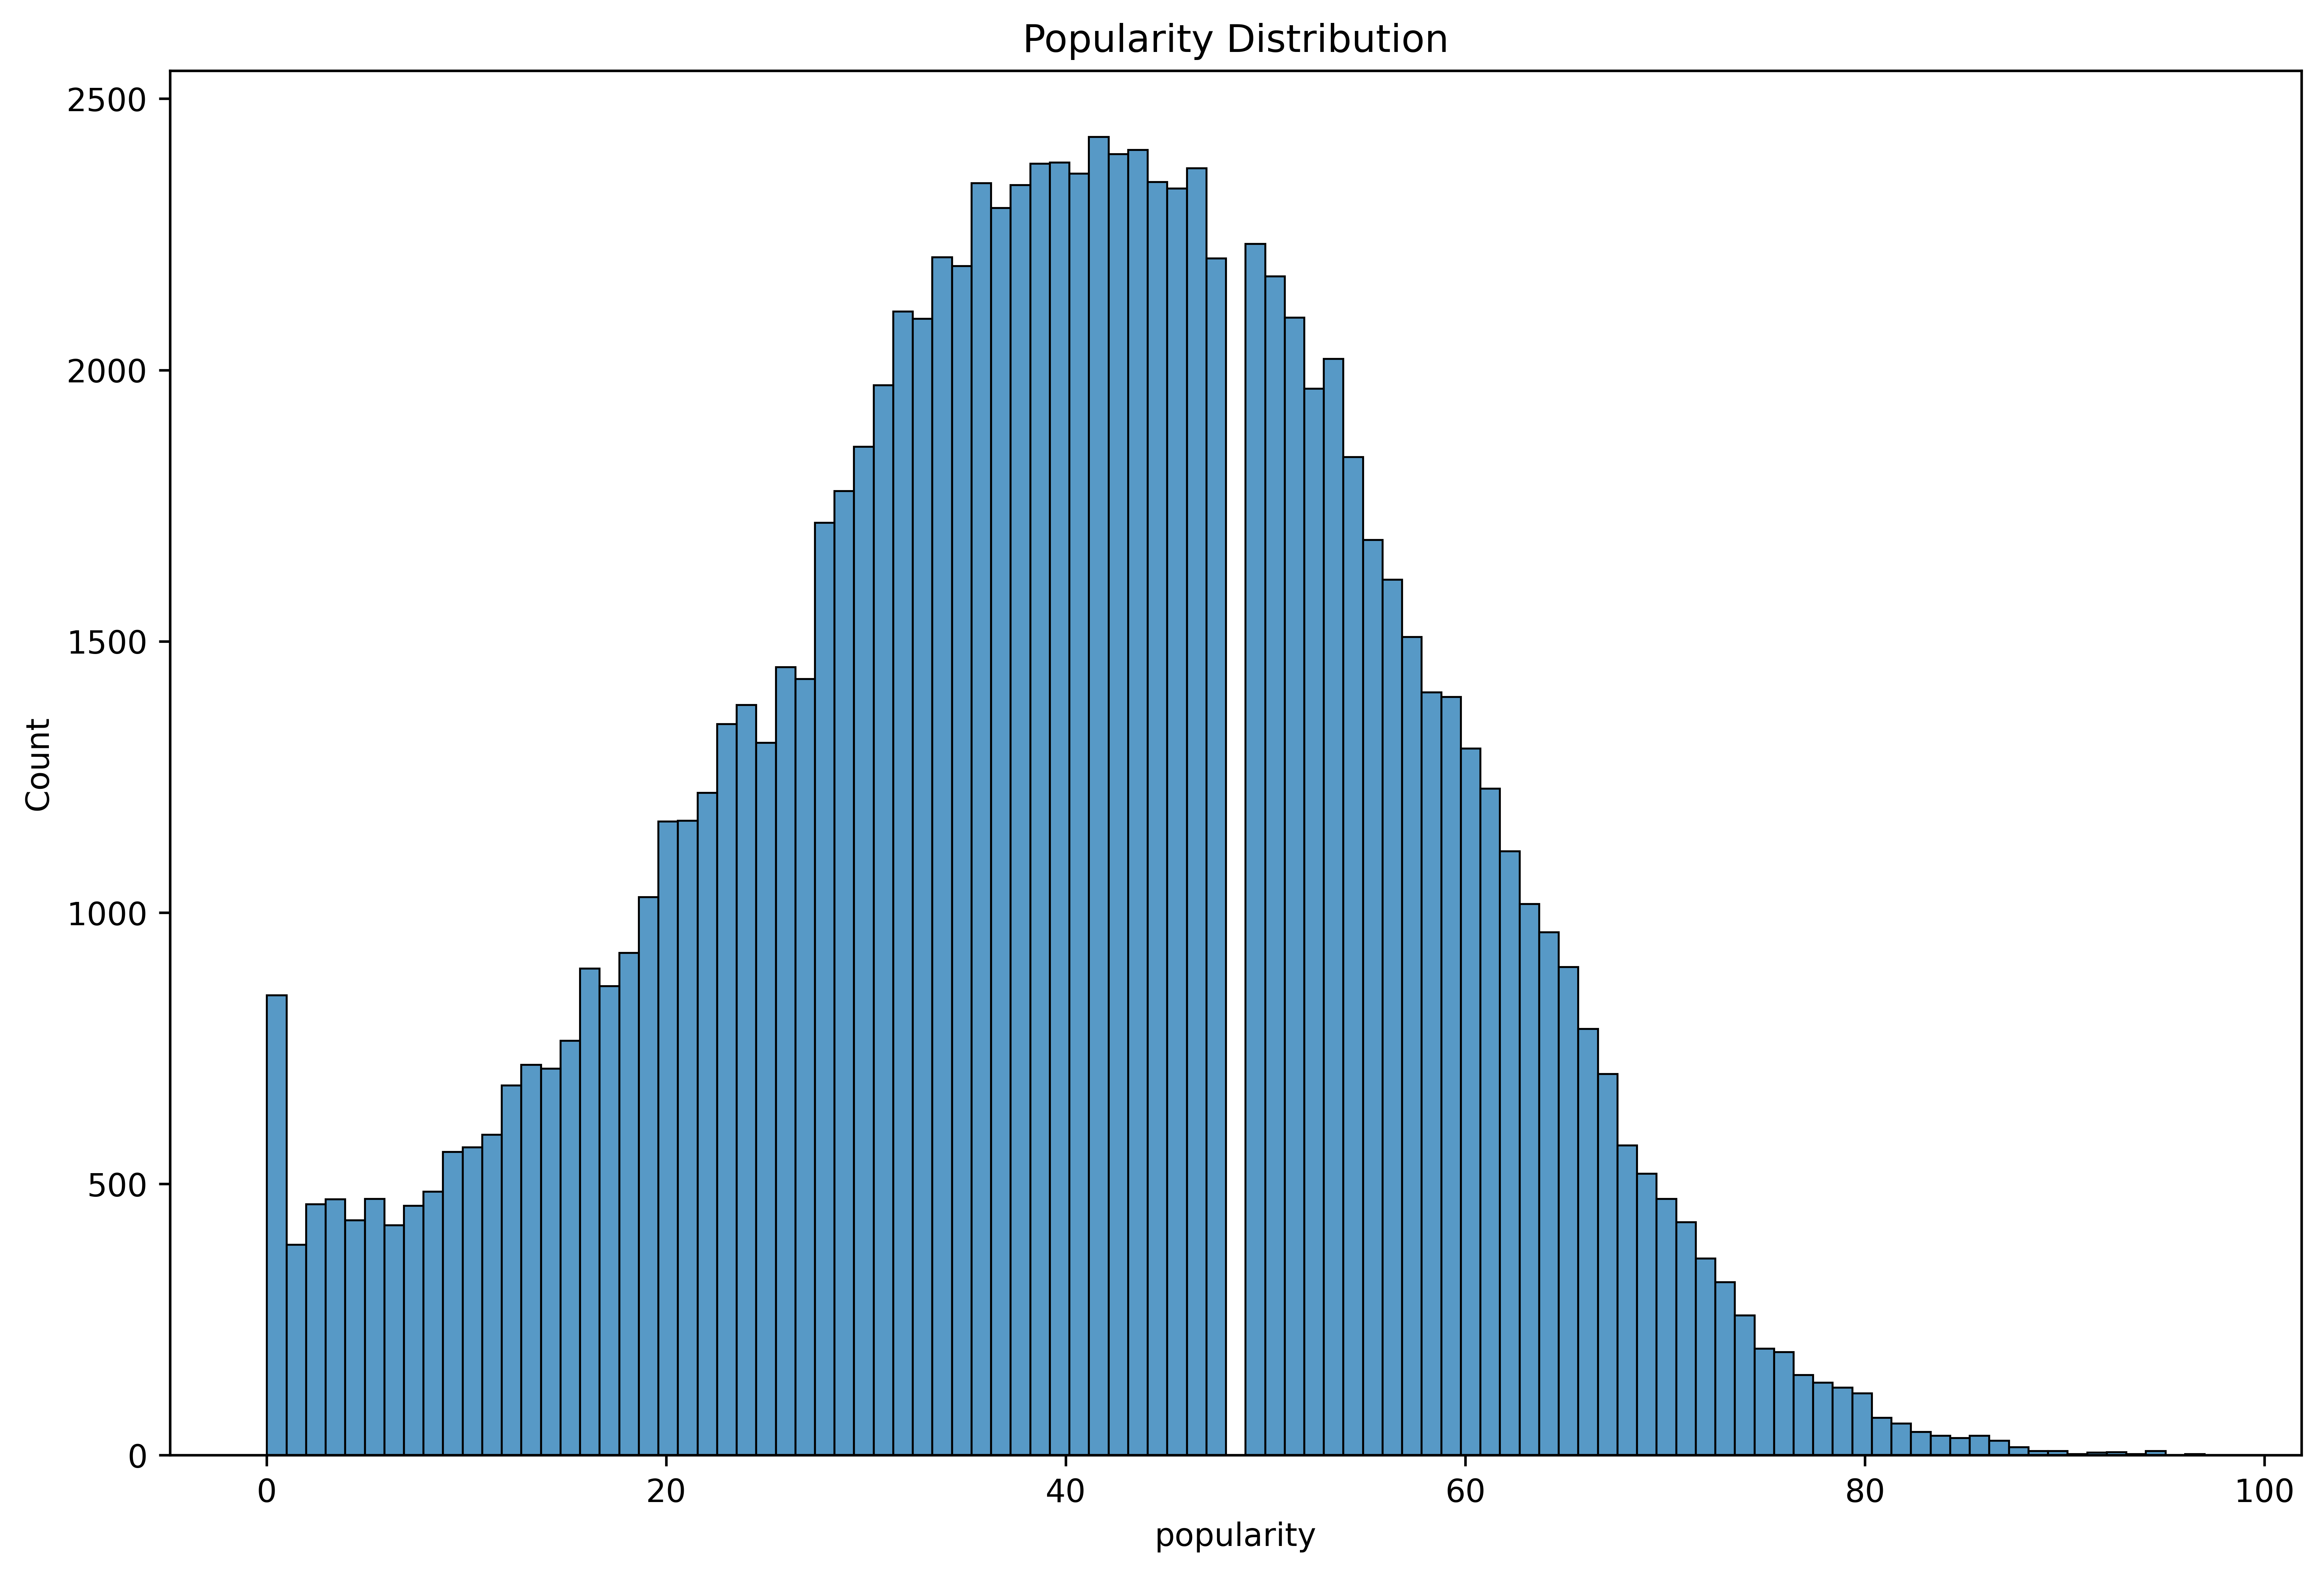

In [54]:
plt.figure(figsize=(12,8), dpi=600)
plt.title('Popularity Distribution')
sns.histplot(tracks['popularity']);

In [9]:
tracks_copy = tracks.copy()

To drop:

* analysis_url
* href
* preview_url
* track_href
* lyrics

To add:

* album_id -> album_type, release_date, total_tracks
* artists_id -> artist_popularity, followers, genres, name
* id -> vocabulary_wealth, sentence_similarity, n_words. n_sentences, mean_words_sentence, mean_syllables_word

In [10]:
tracks.drop(["analysis_url", "href", "preview_url", "track_href", "lyrics"], axis=1, inplace=True)

In [11]:
albums.head()

Unnamed: 0 album_type               artist_id  \
0           0     single  3DiDSECUqqY1AuBP8qtaIa   
1           1      album  6s1pCNXcbdtQJlsnM1hRIA   
2           2     single  5YjfNaHq05WrwldRe1QSBc   
3           3     single  2G9Vc16JCpnZmK4uGH46Fa   
4           4     single  2dwM9OcE4c3Ph1UBINSodx   

                                   available_markets  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
1  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
2  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
3  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
4  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   

                                       external_urls  \
0  {'spotify': 'https://open.spotify.com/album/1g...   
1  {'spotify': 'https://open.spotify.com/album/4K...   
2  {'spotify': 'https://open.spotify.com/album/7n...   
3  {'spotify': 'https://open.spotify.com/album/6p...   
4  {'spotify': 'https://open.spotify.com/album/1X...   

                                                href                      id  \
0  https://api.spotify.com/v1/albums/1gAM7M4rBwEb...  1gAM7M4rBwEbSPeAQR2nx1   
1  https://api.spotify.com/v1/albums/4KfJZV7WfolY...  4KfJZV7WfolYlxBzOTo66s   
2  https://api.spotify.com/v1/albums/7nLYY7uAVUb5...  7nLYY7uAVUb57kpd7tZxnS   
3  https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...  6p20Rt4x2Qn5mUMRi1s6pj   
4  https://api.spotify.com/v1/albums/1XeoOqC1q7U2...  1XeoOqC1q7U2iyLEQJ64cu   

                                              images  \
0  [{'height': 640, 'url': 'https://i.scdn.co/ima...   
1  [{'height': 640, 'url': 'https://i.scdn.co/ima...   
2  [{'height': 640, 'url': 'https://i.scdn.co/ima...   
3  [{'height': 640, 'url': 'https://i.scdn.co/ima...   
4  [{'height': 640, 'url': 'https://i.scdn.co/ima...   

                                                name release_date  \
0                              If I Ain't Got You EP   2019-02-08   
1  Shostakovich Symphony No.5 - Four Romances on ...   2019-03-01   
2                                       Take My Bass   2019-03-14   
3                                Hypnotizing (Are U)   2016-11-16   
4                                           Sunshine   2018-07-20   

  release_date_precision  total_tracks                track_id  \
0                    day             6  2iejTMy9XZ8Gaae0aQ2yl0   
1                    day             8  1WQfghEjszJJ4H8MAWrQ2C   
2                    day             1  3jJKj4QTK3v18ZSwpk7AcV   
3                    day             1  1xGtDafUZbHyYC3Xarcbrj   
4                    day             1  0gWtsXvXOzAT6FtM3ur8in   

  track_name_prev                                   uri   type  
0        track_32  spotify:album:1gAM7M4rBwEbSPeAQR2nx1  album  
1        track_11  spotify:album:4KfJZV7WfolYlxBzOTo66s  album  
2        track_15  spotify:album:7nLYY7uAVUb57kpd7tZxnS  album  
3        track_46  spotify:album:6p20Rt4x2Qn5mUMRi1s6pj  album  
4        track_10  spotify:album:1XeoOqC1q7U2iyLEQJ64cu  album

In [12]:
albums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              75511 non-null  int64 
 1   album_type              75511 non-null  object
 2   artist_id               75511 non-null  object
 3   available_markets       75511 non-null  object
 4   external_urls           75511 non-null  object
 5   href                    75511 non-null  object
 6   id                      75511 non-null  object
 7   images                  75511 non-null  object
 8   name                    75511 non-null  object
 9   release_date            75511 non-null  object
 10  release_date_precision  75511 non-null  object
 11  total_tracks            75511 non-null  int64 
 12  track_id                75511 non-null  object
 13  track_name_prev         75511 non-null  object
 14  uri                     75511 non-null  object
 15  ty

In [13]:
albums.drop(["available_markets", "external_urls", 
             "href", "images", "release_date_precision", 
             "track_name_prev", "uri", "type"],
           axis=1, inplace=True)

In [14]:
tracks_albums = tracks.merge(albums, how="inner", left_on="album_id", right_on="id")

In [15]:
tracks_albums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101939 entries, 0 to 101938
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   acousticness       101939 non-null  float64
 1   album_id           101939 non-null  object 
 2   artists_id         101939 non-null  object 
 3   available_markets  101939 non-null  object 
 4   country            101939 non-null  object 
 5   danceability       101939 non-null  float64
 6   disc_number        101939 non-null  float64
 7   duration_ms        101939 non-null  float64
 8   energy             101939 non-null  float64
 9   id_x               101939 non-null  object 
 10  instrumentalness   101939 non-null  float64
 11  key                101939 non-null  float64
 12  liveness           101939 non-null  float64
 13  loudness           101939 non-null  float64
 14  mode               101939 non-null  float64
 15  name_x             101939 non-null  object 
 16  pl

In [16]:
tracks_albums.drop(["id_x", "id_y", "Unnamed: 0"], axis=1, inplace=True)

In [17]:
artists.head()

Unnamed: 0  artist_popularity  followers  \
0           0                 44      23230   
1           1                 22        313   
2           2                 26       1596   
3           3                 31        149   
4           4                 21         11   

                                              genres                      id  \
0  ['sertanejo', 'sertanejo pop', 'sertanejo trad...  4mGnpjhqgx4RUdsIJiURdo   
1                                                 []  1dLnVku4VQUOLswwDFvRc9   
2                                ['danish pop rock']  6YVY310fjfUzKi8hiqR7iK   
3                             ['uk alternative pop']  2VElyouiCfoYPDJluzwJwK   
4                                 ['french baroque']  4agVy03qW8juSysCTUOuDI   

                  name                track_id track_name_prev    type  
0        Juliano Cezar  0wmDmAILuW9e2aRttkl4aC         track_9  artist  
1       The Grenadines  4wqwj0gA8qPZKLl5WVqXml        track_30  artist  
2              Gangway  1bFqWDbvHmZe2f4Nf9qaD8        track_38  artist  
3                FADES  3MFSUBAidPzRBbIS7BDj1S        track_34  artist  
4  Jean-Pierre Guignon  2r3q57FhxdsCyYr0kuDq4b        track_26  artist

In [75]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56129 entries, 0 to 56128
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_popularity  56129 non-null  int64 
 1   followers          56129 non-null  int64 
 2   genres             56129 non-null  object
 3   id                 56129 non-null  object
 4   name               56128 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.1+ MB


In [18]:
artists.drop(["Unnamed: 0", "track_id", "track_name_prev", "type"], axis=1, inplace=True)

In [19]:
tracks_artists = tracks_albums.merge(artists, how="inner", left_on="artist_id", right_on="id")

In [20]:
tracks_artists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101144 entries, 0 to 101143
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   acousticness       101144 non-null  float64
 1   album_id           101144 non-null  object 
 2   artists_id         101144 non-null  object 
 3   available_markets  101144 non-null  object 
 4   country            101144 non-null  object 
 5   danceability       101144 non-null  float64
 6   disc_number        101144 non-null  float64
 7   duration_ms        101144 non-null  float64
 8   energy             101144 non-null  float64
 9   instrumentalness   101144 non-null  float64
 10  key                101144 non-null  float64
 11  liveness           101144 non-null  float64
 12  loudness           101144 non-null  float64
 13  mode               101144 non-null  float64
 14  name_x             101144 non-null  object 
 15  playlist           101144 non-null  object 
 16  po

In [21]:
lyrics.head()

Unnamed: 0  mean_syllables_word  mean_words_sentence  n_sentences  n_words  \
0           0                -1.00                -1.00           -1       -1   
1           1                 1.10                 5.65           31      326   
2           2                 1.37                 4.77           74      532   
3           3                 1.95                 3.38           72      430   
4           4                 1.16                 2.99           68      368   

   sentence_similarity                track_id  vocabulary_wealth  
0            -1.000000  5KIfHjHI5NIsPHNt58qua0              -1.00  
1             0.043011  13keyz9ikBe6ZpRasw7l4X               0.45  
2             0.050352  1WugzepXsLjnsM0K4UaWYc               0.59  
3             0.028560  2MO6oEAlMKcsfI8xP3yoy8               0.49  
4             0.047849  1i4St7fmSUE9nB3R9n8fol               0.47

In [22]:
lyrics.drop("Unnamed: 0", axis=1, inplace=True)

In [23]:
df_merged = tracks_artists.merge(lyrics, how="inner", on="track_id")

In [24]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94321 entries, 0 to 94320
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   acousticness         94321 non-null  float64
 1   album_id             94321 non-null  object 
 2   artists_id           94321 non-null  object 
 3   available_markets    94321 non-null  object 
 4   country              94321 non-null  object 
 5   danceability         94321 non-null  float64
 6   disc_number          94321 non-null  float64
 7   duration_ms          94321 non-null  float64
 8   energy               94321 non-null  float64
 9   instrumentalness     94321 non-null  float64
 10  key                  94321 non-null  float64
 11  liveness             94321 non-null  float64
 12  loudness             94321 non-null  float64
 13  mode                 94321 non-null  float64
 14  name_x               94321 non-null  object 
 15  playlist             94321 non-null 

In [25]:
df_merged.head()

acousticness                album_id                  artists_id  \
0         0.294  0D3QufeCudpQANOR7luqdr  ['3mxJuHRn2ZWD5OofvJtDZY']   
1         0.166  3wIjGVauUxR4c3NvnQZ0Jo  ['3mxJuHRn2ZWD5OofvJtDZY']   
2         0.863  1bcqsH5UyTBzmh9YizdsBE  ['4xWMewm6CYMstu0sPgd9jJ']   
3         0.824  1bcqsH5UyTBzmh9YizdsBE  ['4xWMewm6CYMstu0sPgd9jJ']   
4         0.824  51g5viCaYjOW5XO4qX1RCD  ['4xWMewm6CYMstu0sPgd9jJ']   

                                   available_markets country  danceability  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.698   
1  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      AR         0.543   
2  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.719   
3  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.752   
4  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.688   

   disc_number  duration_ms  energy  instrumentalness  ...  followers  \
0          1.0     235584.0   0.606          0.000003  ...        425   
1          1.0     233998.0   0.612          0.000000  ...        425   
2          1.0     656960.0   0.308          0.000000  ...       2965   
3          1.0      27960.0   0.338          0.000024  ...       2965   
4          1.0      29240.0   0.304          0.000000  ...       2965   

              genres                      id                   name  \
0  ['finnish indie']  3mxJuHRn2ZWD5OofvJtDZY           Jesse Markin   
1  ['finnish indie']  3mxJuHRn2ZWD5OofvJtDZY           Jesse Markin   
2                 []  4xWMewm6CYMstu0sPgd9jJ  Favorite Kids Stories   
3                 []  4xWMewm6CYMstu0sPgd9jJ  Favorite Kids Stories   
4                 []  4xWMewm6CYMstu0sPgd9jJ  Favorite Kids Stories   

  mean_syllables_word mean_words_sentence  n_sentences  n_words  \
0                1.39                3.13           39      208   
1                1.25                2.67           81      363   
2                1.44               25.56          106     5106   
3                1.44               25.56          106     5106   
4                1.44               25.56          106     5106   

   sentence_similarity  vocabulary_wealth  
0             0.028340               0.64  
1             0.349074               0.16  
2             0.000180               0.57  
3             0.000180               0.57  
4             0.000180               0.57  

[5 rows x 42 columns]

In [29]:
df_merged.name

0                 Jesse Markin
1                 Jesse Markin
2        Favorite Kids Stories
3        Favorite Kids Stories
4        Favorite Kids Stories
                 ...          
94316                 Tom Enzy
94317               Tone Stith
94318                    CYBER
94319               Eskimo Joe
94320               Eskimo Joe
Name: name, Length: 94321, dtype: object

In [30]:
df_merged.drop(["album_id", "artists_id", "uri", "type", "id"], axis=1, inplace=True)

In [32]:
df_merged.country.value_counts()

AR    46439
FI    28113
BE    19769
Name: country, dtype: int64

In [34]:
df_merged["available_markets"].value_counts()

['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA']    60515
['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA']           8671
['AD', 'AE', 'AR', 'AT', 'AU', '

In [45]:
df_merged.describe()

acousticness  danceability   disc_number   duration_ms        energy  \
count  94321.000000  94321.000000  94321.000000  9.432100e+04  94321.000000   
mean       0.353023      0.583897      1.032973  2.474373e+05      0.582802   
std        0.337417      0.179120      0.585750  1.941757e+05      0.262391   
min        0.000000      0.000000      1.000000  1.155000e+03      0.000000   
25%        0.039100      0.476000      1.000000  1.837040e+05      0.404000   
50%        0.235000      0.609000      1.000000  2.167120e+05      0.625000   
75%        0.651000      0.714000      1.000000  2.609890e+05      0.796000   
max        0.996000      0.989000     81.000000  5.505831e+06      1.000000   

       instrumentalness           key      liveness      loudness  \
count      94321.000000  94321.000000  94321.000000  94321.000000   
mean           0.157835      5.274467      0.197298     -9.567720   
std            0.311654      3.576414      0.176016      6.275864   
min            0.000000      0.000000      0.000000    -60.000000   
25%            0.000000      2.000000      0.095500    -11.301000   
50%            0.000050      5.000000      0.123000     -7.654000   
75%            0.051000      8.000000      0.239000     -5.538000   
max            1.000000     11.000000      0.999000      2.719000   

               mode  ...       valence  total_tracks  artist_popularity  \
count  94321.000000  ...  94321.000000  94321.000000       94321.000000   
mean       0.621951  ...      0.477390     11.256443          46.025392   
std        0.484903  ...      0.262319     16.254697          21.933941   
min        0.000000  ...      0.000000      1.000000           0.000000   
25%        0.000000  ...      0.264000      1.000000          31.000000   
50%        1.000000  ...      0.469000     10.000000          48.000000   
75%        1.000000  ...      0.689000     14.000000          62.000000   
max        1.000000  ...      0.993000    977.000000          95.000000   

          followers  mean_syllables_word  mean_words_sentence   n_sentences  \
count  9.432100e+04         94321.000000         94321.000000  94321.000000   
mean   5.587326e+05             1.056672             3.422296     43.594629   
std    1.983323e+06             0.962882             7.928188     45.311870   
min    0.000000e+00            -1.000000            -1.000000     -1.000000   
25%    2.635000e+03             1.150000             2.570000     22.000000   
50%    3.242300e+04             1.260000             3.290000     42.000000   
75%    3.587600e+05             1.520000             4.000000     60.000000   
max    4.156169e+07             4.000000           252.500000   2519.000000   

            n_words  sentence_similarity  vocabulary_wealth  
count  94321.000000         94321.000000       94321.000000  
mean     311.612292            -0.112039           0.303731  
std      806.565811             0.394117           0.582780  
min       -1.000000            -1.000000          -1.000000  
25%      128.000000             0.009470           0.400000  
50%      241.000000             0.035996           0.540000  
75%      359.000000             0.066667           0.630000  
max    39111.000000             0.964286           0.780000  

[8 rows x 25 columns]

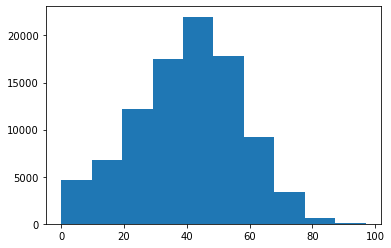

In [44]:
plt.hist(df_merged["popularity"]);

In [46]:
df_merged.head()

acousticness                                  available_markets country  \
0         0.294  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE   
1         0.166  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      AR   
2         0.863  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE   
3         0.824  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE   
4         0.824  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE   

   danceability  disc_number  duration_ms  energy  instrumentalness   key  \
0         0.698          1.0     235584.0   0.606          0.000003  10.0   
1         0.543          1.0     233998.0   0.612          0.000000   9.0   
2         0.719          1.0     656960.0   0.308          0.000000   6.0   
3         0.752          1.0      27960.0   0.338          0.000024   3.0   
4         0.688          1.0      29240.0   0.304          0.000000  10.0   

   liveness  ...  artist_popularity  followers             genres  \
0    0.1510  ...                 28        425  ['finnish indie']   
1    0.1290  ...                 28        425  ['finnish indie']   
2    0.2530  ...                 36       2965                 []   
3    0.0977  ...                 36       2965                 []   
4    0.1420  ...                 36       2965                 []   

                    name  mean_syllables_word  mean_words_sentence  \
0           Jesse Markin                 1.39                 3.13   
1           Jesse Markin                 1.25                 2.67   
2  Favorite Kids Stories                 1.44                25.56   
3  Favorite Kids Stories                 1.44                25.56   
4  Favorite Kids Stories                 1.44                25.56   

   n_sentences  n_words sentence_similarity  vocabulary_wealth  
0           39      208            0.028340               0.64  
1           81      363            0.349074               0.16  
2          106     5106            0.000180               0.57  
3          106     5106            0.000180               0.57  
4          106     5106            0.000180               0.57  

[5 rows x 37 columns]

In [35]:
corr = df_merged.corr()

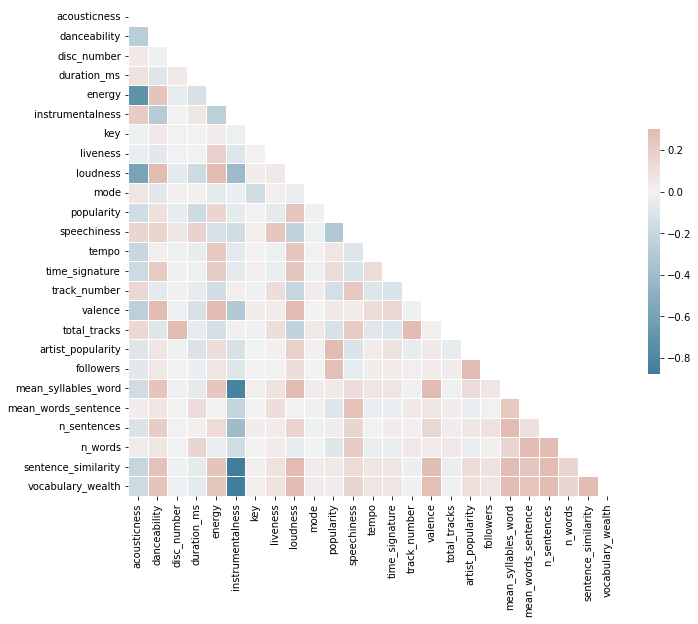

In [38]:
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [42]:
corr.loc["popularity", :].sort_values()

speechiness           -0.312591
duration_ms           -0.177208
acousticness          -0.157327
track_number          -0.139849
total_tracks          -0.131084
mean_words_sentence   -0.093161
n_words               -0.088182
liveness              -0.058387
instrumentalness      -0.055630
disc_number           -0.049109
mode                  -0.011482
key                   -0.000863
vocabulary_wealth      0.024262
n_sentences            0.027254
mean_syllables_word    0.040684
valence                0.047430
sentence_similarity    0.051656
tempo                  0.064849
danceability           0.097866
time_signature         0.127589
energy                 0.160878
loudness               0.247338
followers              0.284684
artist_popularity      0.649425
popularity             1.000000
Name: popularity, dtype: float64

In [62]:
df = tracks[["acousticness", "danceability", "disc_number", "duration_ms", "energy", "instrumentalness", "key",
                     "liveness", "loudness", "mode", "popularity", "speechiness", "tempo", "time_signature", "track_number",
                     "valence"]]

In [63]:
df.head()

acousticness  danceability  disc_number  duration_ms  energy  \
0         0.294         0.698          1.0     235584.0   0.606   
1         0.863         0.719          1.0     656960.0   0.308   
2         0.750         0.466          1.0     492840.0   0.931   
3         0.763         0.719          1.0     316578.0   0.126   
4         0.770         0.460          1.0     558880.0   0.942   

   instrumentalness   key  liveness  loudness  mode  popularity  speechiness  \
0          0.000003  10.0     0.151    -7.447   0.0        28.0       0.0262   
1          0.000000   6.0     0.253   -10.340   1.0        31.0       0.9220   
2          0.000000   4.0     0.938   -13.605   0.0        31.0       0.9440   
3          0.000000   3.0     0.113   -20.254   0.0        14.0       0.9380   
4          0.000000   7.0     0.917   -13.749   1.0        32.0       0.9430   

     tempo  time_signature  track_number  valence  
0  115.018             4.0           1.0   0.6220  
1  115.075             3.0           3.0   0.5890  
2   79.565             4.0           4.0   0.0850  
3  112.822             3.0           1.0   0.5330  
4   81.260             4.0           2.0   0.0906

In [64]:
X = df.drop("popularity", axis=1)
y = df["popularity"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [71]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)

In [73]:
mse = mean_squared_error(y_test, random_forest_preds)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  202.50677284440167
RMSE:  101.25338642220083
